In [108]:
print("Namaste Duniya")

Namaste Duniya


In [109]:
%matplotlib inline

In [110]:
import tensorflow as tf
import numpy as np
import keras as keras
import matplotlib.pyplot as plt
import pandas as pd

tf.__version__

'2.18.0-rc1'

In [111]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [112]:
(training_input,output), (testing_input,target) = fashion_mnist.load_data()
training_input = training_input/255.0
testing_input = training_input/255.0

In [174]:
np.shape(testing_input),np.shape(target)

((60000, 28, 28), (10000,))

Label : Ankle Boots , Index :  0


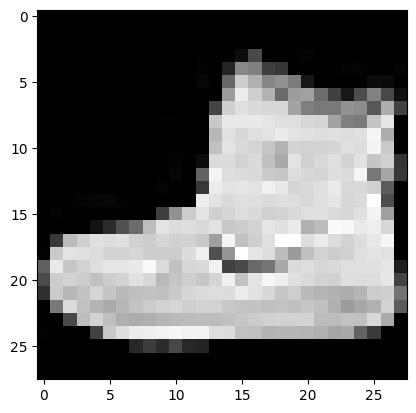

Label : T-Shirt/Top , Index :  1


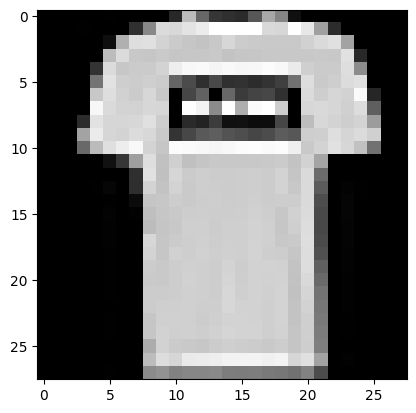

Label : Dress , Index :  3


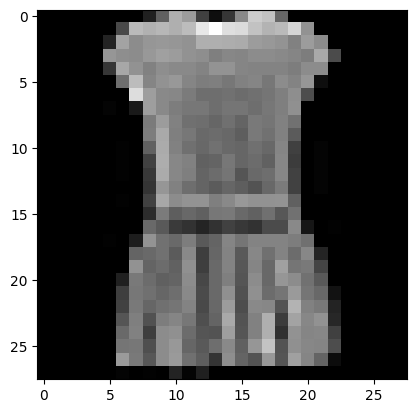

Label : Pullover , Index :  5


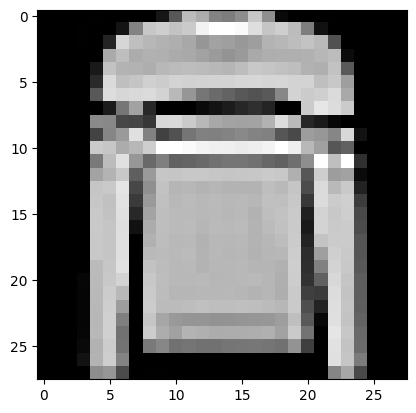

Label : Sneakers , Index :  6


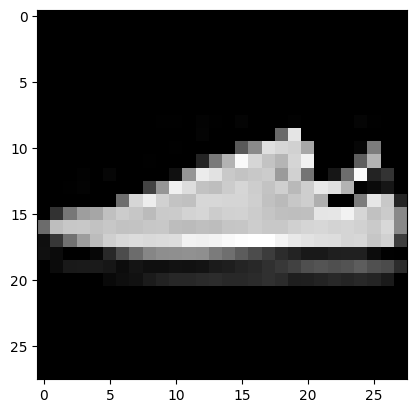

Label : Sandals , Index :  8


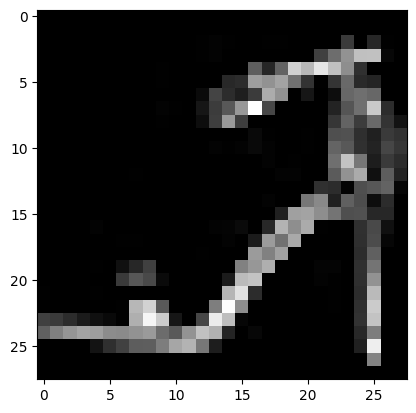

Label : Trouser , Index :  16


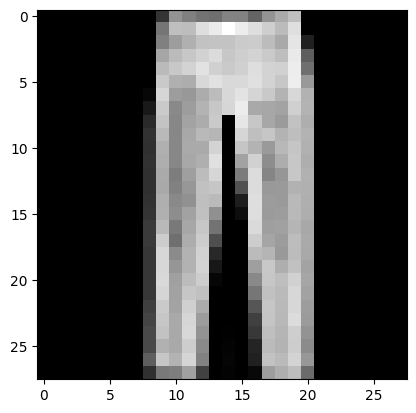

Label : Shirt , Index :  18


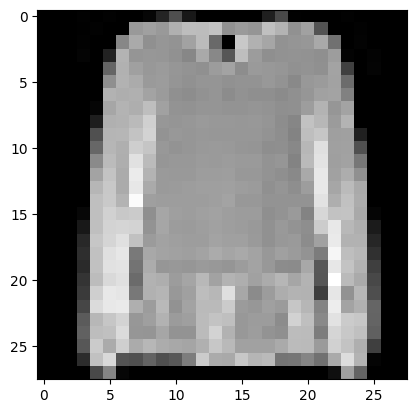

Label : Coat , Index :  19


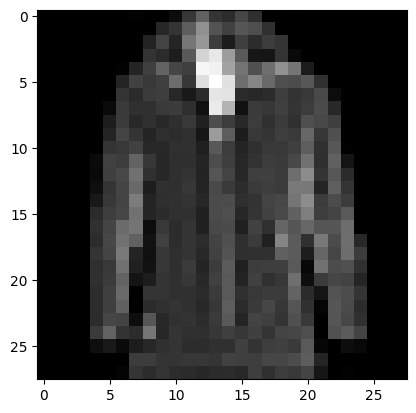

Label : Bag , Index :  35


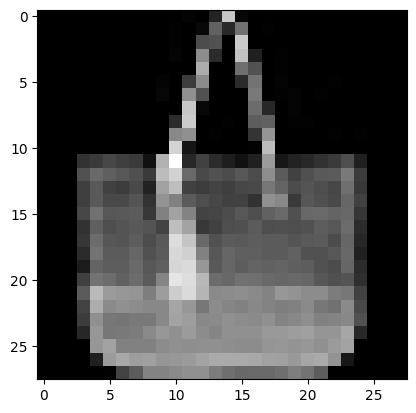

In [113]:
classification_dict = {
    0 : "T-Shirt/Top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandals",
    6 : "Shirt",
    7 : "Sneakers",
    8 : "Bag",
    9 : "Ankle Boots",
}
class_list = []
def is_in_list(i):
    if i in class_list:
        return True
    else:
        return False
    
i = -1
while(len(class_list)<10):
    i += 1
    if(i == 23):
        continue
    if(is_in_list(output[i])):
        continue
    else:
        class_list.append(output[i])
        plt.imshow(X=training_input[i], cmap = plt.get_cmap('grey'))
        print("Label :", classification_dict[output[i]], ",Index : ", i)
        plt.show()

Label : Ankle Boots ,Index :  0


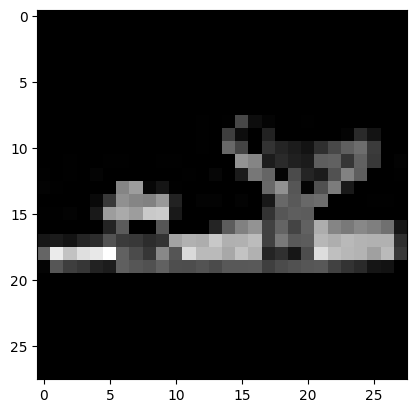

Label : Pullover ,Index :  1


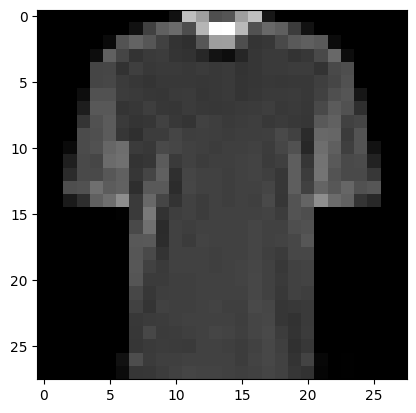

Label : Trouser ,Index :  2


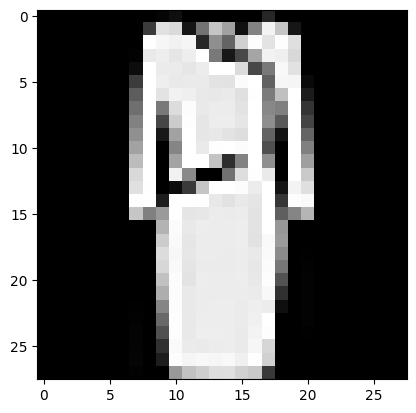

Label : Shirt ,Index :  4


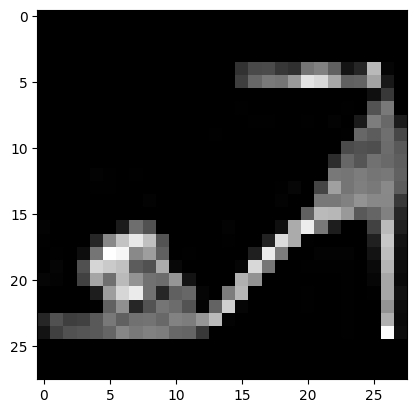

Label : Coat ,Index :  6


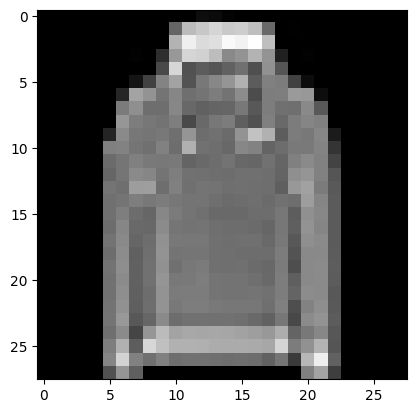

Label : Sandals ,Index :  8


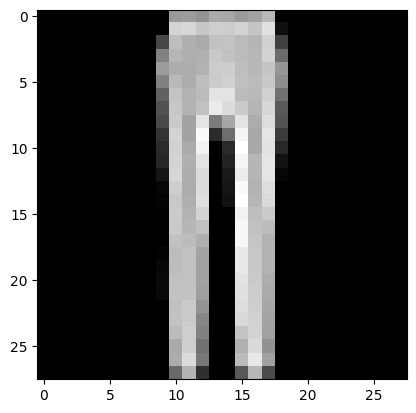

Label : Sneakers ,Index :  9


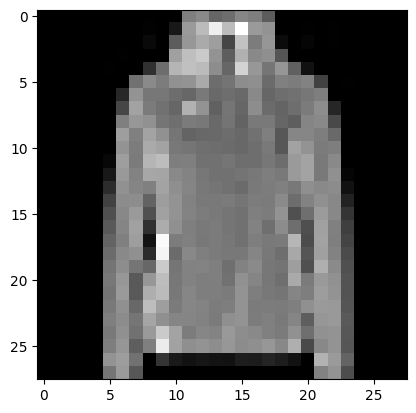

Label : Dress ,Index :  13


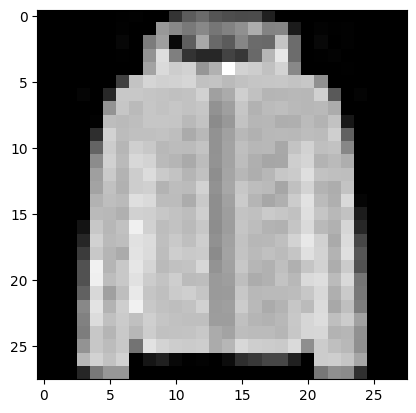

Label : Bag ,Index :  18


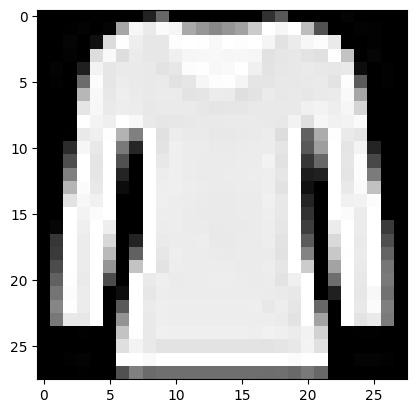

Label : T-Shirt/Top ,Index :  19


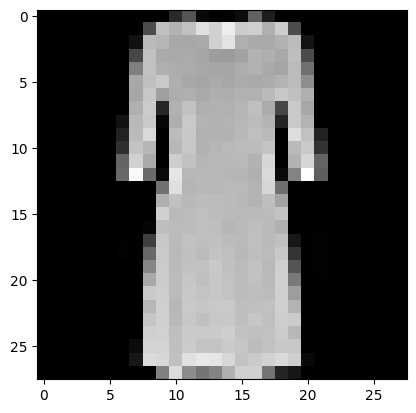

In [182]:
class_list = []
def is_in_list(i):
    if i in class_list:
        return True
    else:
        return False
    
i = -1
testing_input[::-1]
while(len(class_list)<10):
    i += 1
    if(i == 23):
        continue
    if(is_in_list(target[i])):
        continue
    else:
        class_list.append(target[i])
        plt.imshow(X=testing_input[i], cmap = plt.get_cmap('grey'))
        print("Label :", classification_dict[target[i]], ",Index : ", i)
        plt.show()

In [161]:
main_fashion_mnist_ANN = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation= 'relu', use_bias = False),
    tf.keras.layers.Dense(32 , activation= 'tanh', use_bias = False),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [162]:
main_fashion_mnist_ANN.compile(optimizer=tf.keras.optimizers.Adadelta(),loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [122]:
main_fashion_mnist_ANN.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_22 (Flatten)            │ (32, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (32, 128)              │       100,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,928 (1.16 MB)

 Trainable params: 101,642 (397.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,286 (794.09 KB)

In [139]:
output

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [212]:
for i in range(10):
    print(i+1,"th Iteration for the model fitting")
    main_fashion_mnist_ANN.fit(x = training_input, y = output, epochs=5, batch_size= 32)

1 th Iteration for the model fitting
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8195 - loss: 0.5813
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8216 - loss: 0.5763
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8221 - loss: 0.5726
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8218 - loss: 0.5739
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8248 - loss: 0.5673
2 th Iteration for the model fitting
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8234 - loss: 0.5630
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8220 - loss: 0.5683
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8217 - loss: 0.5656
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8235 - loss: 0.5615
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8225 - loss: 0.5587
3 th Iteration for the model fitting
Epoch 1/5

In [213]:
for i in range(20):
    print(i+1,"th Iteration for the model fitting")
    main_fashion_mnist_ANN.fit(x = training_input, y = output, epochs=5, batch_size= 32)

1 th Iteration for the model fitting
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8405 - loss: 0.4893
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8403 - loss: 0.4880
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8389 - loss: 0.4855
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8410 - loss: 0.4889
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8413 - loss: 0.4850
2 th Iteration for the model fitting
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8407 - loss: 0.4862
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8408 - loss: 0.4838
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8417 - loss: 0.4801
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8404 - loss: 0.4811
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8383 - loss: 0.4894
3 th Iteration for the model fitting
Epoch 1/5

In [172]:
tf.constant(testing_input) , tf.constant(target)

(<tf.Tensor: shape=(60000, 28, 28), dtype=float64, numpy=
 array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., 

In [214]:
main_fashion_mnist_ANN.evaluate(training_input,output)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8582 - loss: 0.4207


[0.4222398102283478, 0.856249988079071]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Ankle Boots 1 th image


<Figure size 640x200 with 0 Axes>

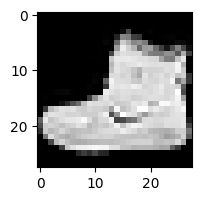

T-Shirt/Top 2 th image


<Figure size 640x200 with 0 Axes>

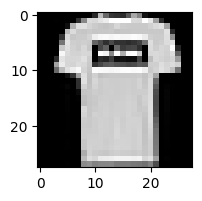

Trouser 3 th image


<Figure size 640x200 with 0 Axes>

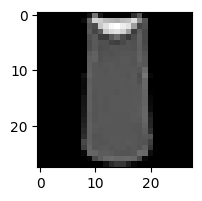

Shirt 4 th image


<Figure size 640x200 with 0 Axes>

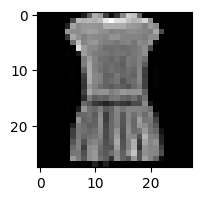

Dress 5 th image


<Figure size 640x200 with 0 Axes>

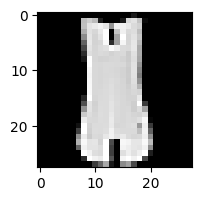

Pullover 6 th image


<Figure size 640x200 with 0 Axes>

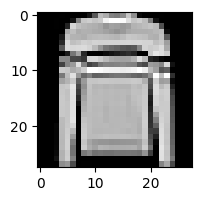

Sneakers 7 th image


<Figure size 640x200 with 0 Axes>

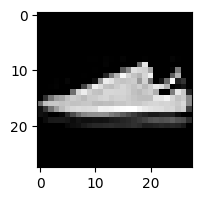

Pullover 8 th image


<Figure size 640x200 with 0 Axes>

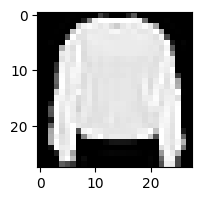

Sandals 9 th image


<Figure size 640x200 with 0 Axes>

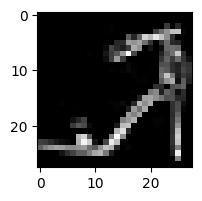

Sandals 10 th image


<Figure size 640x200 with 0 Axes>

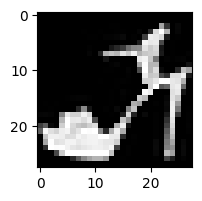

T-Shirt/Top 11 th image


<Figure size 640x200 with 0 Axes>

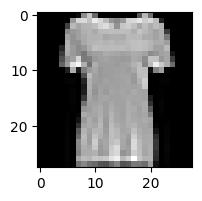

Ankle Boots 12 th image


<Figure size 640x200 with 0 Axes>

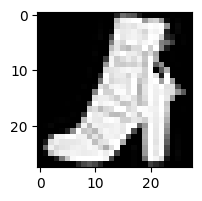

Sandals 13 th image


<Figure size 640x200 with 0 Axes>

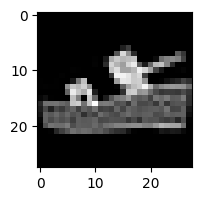

Sandals 14 th image


<Figure size 640x200 with 0 Axes>

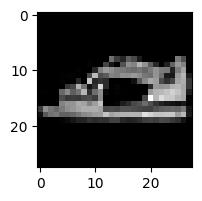

Sneakers 15 th image


<Figure size 640x200 with 0 Axes>

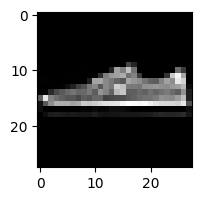

Ankle Boots 16 th image


<Figure size 640x200 with 0 Axes>

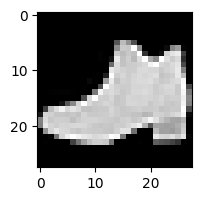

Trouser 17 th image


<Figure size 640x200 with 0 Axes>

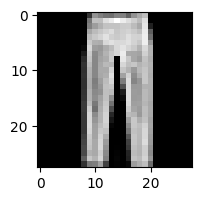

T-Shirt/Top 18 th image


<Figure size 640x200 with 0 Axes>

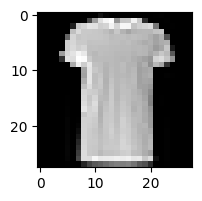

Pullover 19 th image


<Figure size 640x200 with 0 Axes>

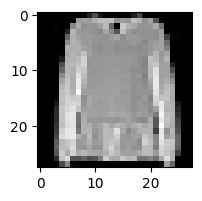

Coat 20 th image


<Figure size 640x200 with 0 Axes>

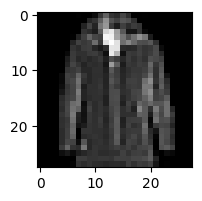

Dress 21 th image


<Figure size 640x200 with 0 Axes>

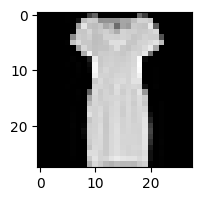

Trouser 22 th image


<Figure size 640x200 with 0 Axes>

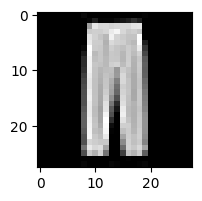

Coat 23 th image


<Figure size 640x200 with 0 Axes>

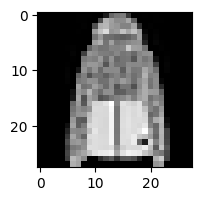

Bag 24 th image


<Figure size 640x200 with 0 Axes>

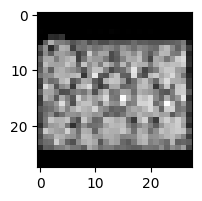

Pullover 25 th image


<Figure size 640x200 with 0 Axes>

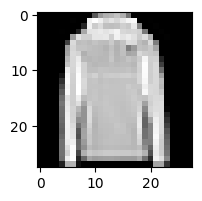

Dress 26 th image


<Figure size 640x200 with 0 Axes>

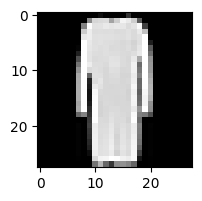

T-Shirt/Top 27 th image


<Figure size 640x200 with 0 Axes>

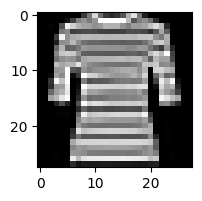

Pullover 28 th image


<Figure size 640x200 with 0 Axes>

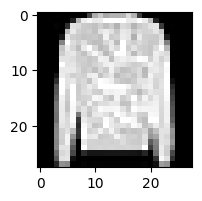

Coat 29 th image


<Figure size 640x200 with 0 Axes>

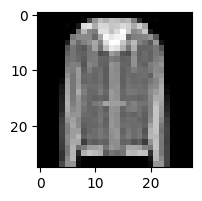

Coat 30 th image


<Figure size 640x200 with 0 Axes>

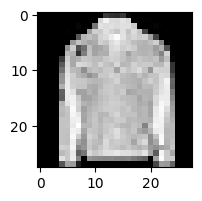

Sandals 31 th image


<Figure size 640x200 with 0 Axes>

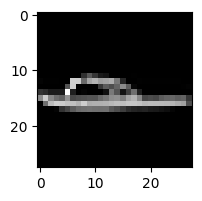

Dress 32 th image


<Figure size 640x200 with 0 Axes>

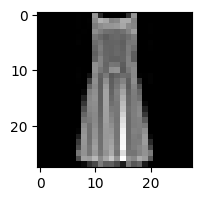

Shirt 33 th image


<Figure size 640x200 with 0 Axes>

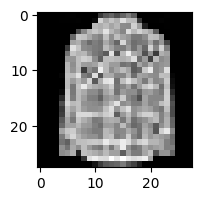

Shirt 34 th image


<Figure size 640x200 with 0 Axes>

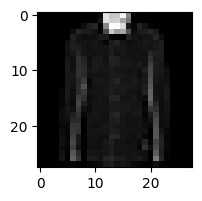

T-Shirt/Top 35 th image


<Figure size 640x200 with 0 Axes>

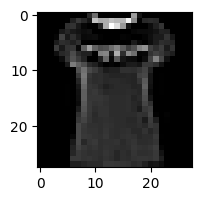

Bag 36 th image


<Figure size 640x200 with 0 Axes>

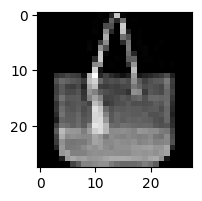

Bag 37 th image


<Figure size 640x200 with 0 Axes>

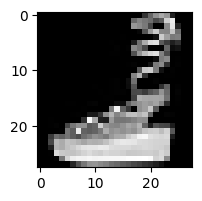

Pullover 38 th image


<Figure size 640x200 with 0 Axes>

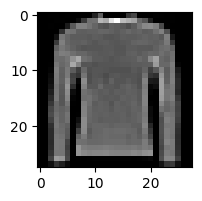

Trouser 39 th image


<Figure size 640x200 with 0 Axes>

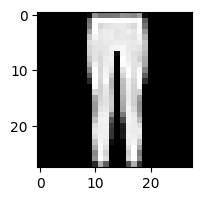

Shirt 40 th image


<Figure size 640x200 with 0 Axes>

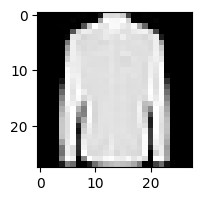

Shirt 41 th image


<Figure size 640x200 with 0 Axes>

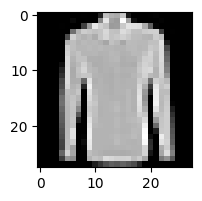

Sneakers 42 th image


<Figure size 640x200 with 0 Axes>

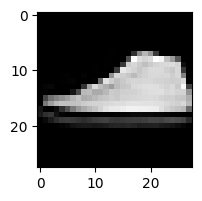

Ankle Boots 43 th image


<Figure size 640x200 with 0 Axes>

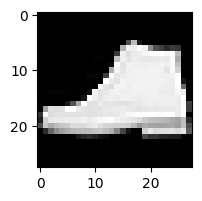

Sandals 44 th image


<Figure size 640x200 with 0 Axes>

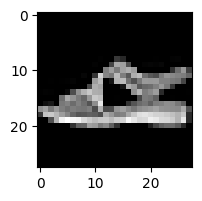

Ankle Boots 45 th image


<Figure size 640x200 with 0 Axes>

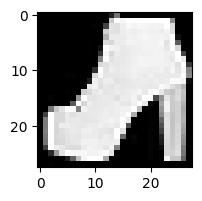

Pullover 46 th image


<Figure size 640x200 with 0 Axes>

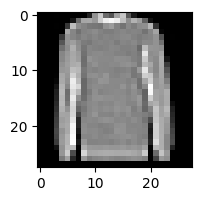

Sneakers 47 th image


<Figure size 640x200 with 0 Axes>

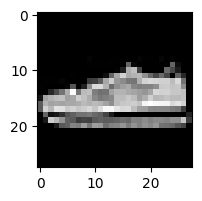

Dress 48 th image


<Figure size 640x200 with 0 Axes>

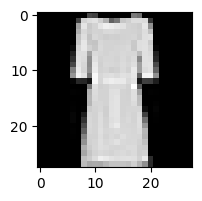

T-Shirt/Top 49 th image


<Figure size 640x200 with 0 Axes>

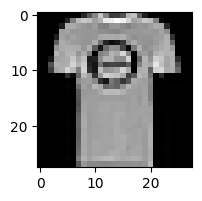

Dress 50 th image


<Figure size 640x200 with 0 Axes>

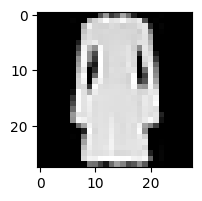

Dress 51 th image


<Figure size 640x200 with 0 Axes>

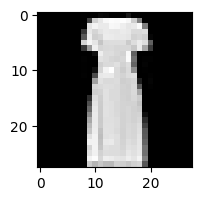

Dress 52 th image


<Figure size 640x200 with 0 Axes>

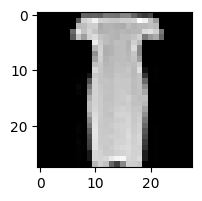

Sneakers 53 th image


<Figure size 640x200 with 0 Axes>

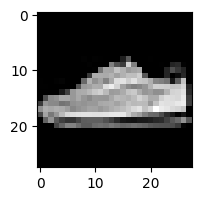

Pullover 54 th image


<Figure size 640x200 with 0 Axes>

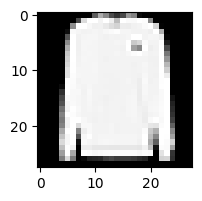

Pullover 55 th image


<Figure size 640x200 with 0 Axes>

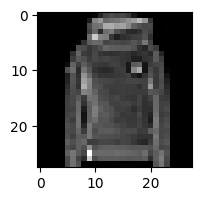

T-Shirt/Top 56 th image


<Figure size 640x200 with 0 Axes>

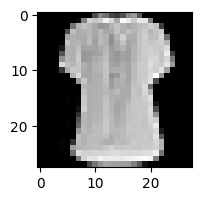

T-Shirt/Top 57 th image


<Figure size 640x200 with 0 Axes>

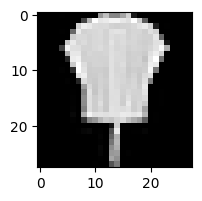

Bag 58 th image


<Figure size 640x200 with 0 Axes>

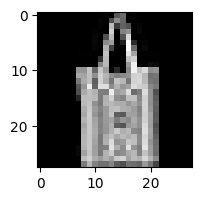

Dress 59 th image


<Figure size 640x200 with 0 Axes>

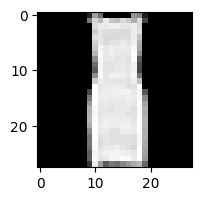

Dress 60 th image


<Figure size 640x200 with 0 Axes>

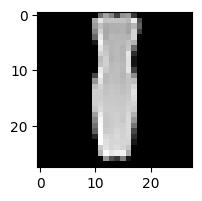

Sandals 61 th image


<Figure size 640x200 with 0 Axes>

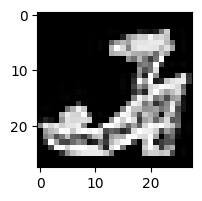

T-Shirt/Top 62 th image


<Figure size 640x200 with 0 Axes>

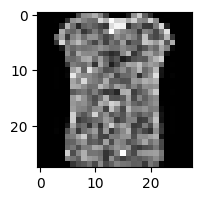

Sandals 63 th image


<Figure size 640x200 with 0 Axes>

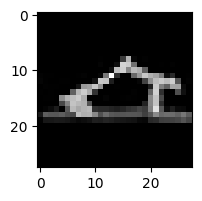

Sandals 64 th image


<Figure size 640x200 with 0 Axes>

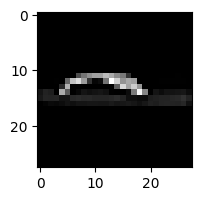

T-Shirt/Top 65 th image


<Figure size 640x200 with 0 Axes>

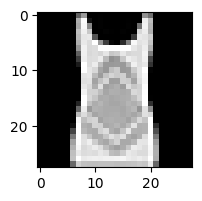

Pullover 66 th image


<Figure size 640x200 with 0 Axes>

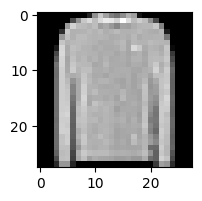

T-Shirt/Top 67 th image


<Figure size 640x200 with 0 Axes>

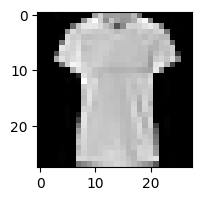

T-Shirt/Top 68 th image


<Figure size 640x200 with 0 Axes>

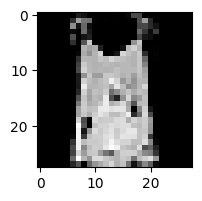

Coat 69 th image


<Figure size 640x200 with 0 Axes>

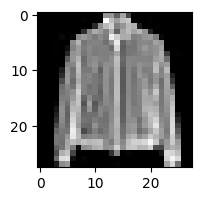

Trouser 70 th image


<Figure size 640x200 with 0 Axes>

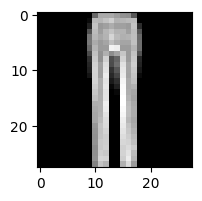

Shirt 71 th image


<Figure size 640x200 with 0 Axes>

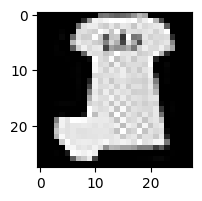

Trouser 72 th image


<Figure size 640x200 with 0 Axes>

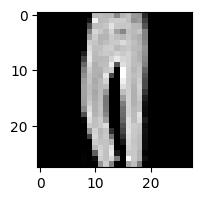

Shirt 73 th image


<Figure size 640x200 with 0 Axes>

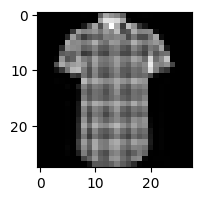

Dress 74 th image


<Figure size 640x200 with 0 Axes>

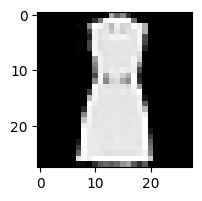

Trouser 75 th image


<Figure size 640x200 with 0 Axes>

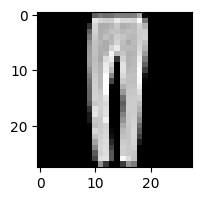

Coat 76 th image


<Figure size 640x200 with 0 Axes>

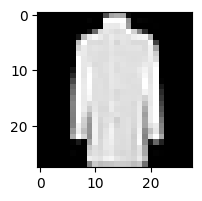

Coat 77 th image


<Figure size 640x200 with 0 Axes>

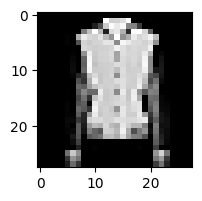

T-Shirt/Top 78 th image


<Figure size 640x200 with 0 Axes>

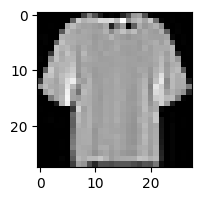

Trouser 79 th image


<Figure size 640x200 with 0 Axes>

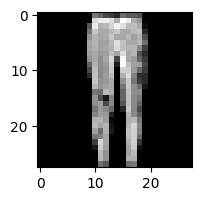

Ankle Boots 80 th image


<Figure size 640x200 with 0 Axes>

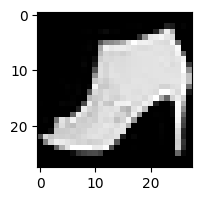

Trouser 81 th image


<Figure size 640x200 with 0 Axes>

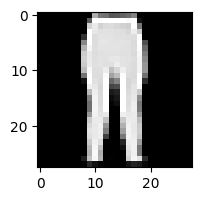

Dress 82 th image


<Figure size 640x200 with 0 Axes>

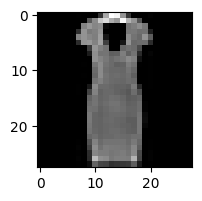

Sandals 83 th image


<Figure size 640x200 with 0 Axes>

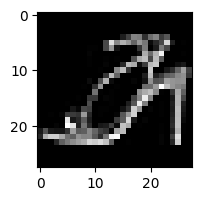

Sneakers 84 th image


<Figure size 640x200 with 0 Axes>

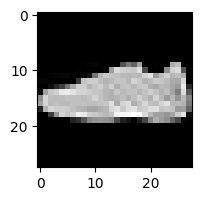

Ankle Boots 85 th image


<Figure size 640x200 with 0 Axes>

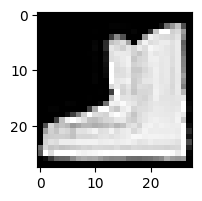

Sneakers 86 th image


<Figure size 640x200 with 0 Axes>

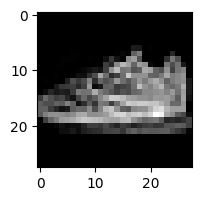

Trouser 87 th image


<Figure size 640x200 with 0 Axes>

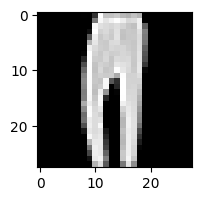

Sneakers 88 th image


<Figure size 640x200 with 0 Axes>

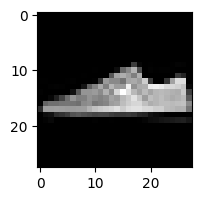

Ankle Boots 89 th image


<Figure size 640x200 with 0 Axes>

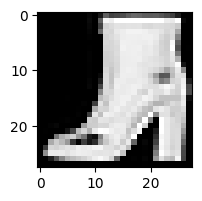

Ankle Boots 90 th image


<Figure size 640x200 with 0 Axes>

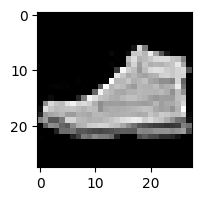

Ankle Boots 91 th image


<Figure size 640x200 with 0 Axes>

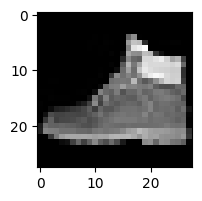

Dress 92 th image


<Figure size 640x200 with 0 Axes>

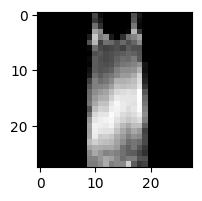

Pullover 93 th image


<Figure size 640x200 with 0 Axes>

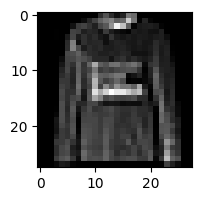

Ankle Boots 94 th image


<Figure size 640x200 with 0 Axes>

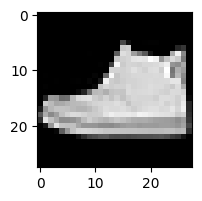

Dress 95 th image


<Figure size 640x200 with 0 Axes>

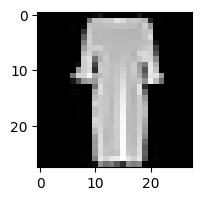

Shirt 96 th image


<Figure size 640x200 with 0 Axes>

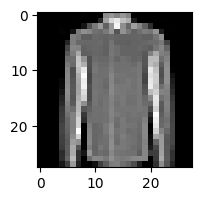

Coat 97 th image


<Figure size 640x200 with 0 Axes>

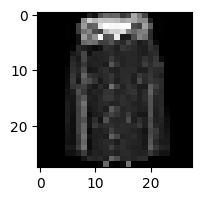

Trouser 98 th image


<Figure size 640x200 with 0 Axes>

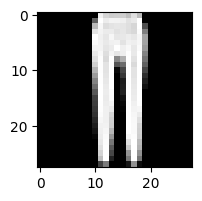

Trouser 99 th image


<Figure size 640x200 with 0 Axes>

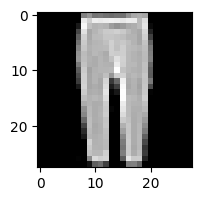

Bag 100 th image


<Figure size 640x200 with 0 Axes>

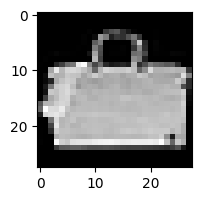

In [217]:
prediction = main_fashion_mnist_ANN.predict(training_input)
for i in range(100):
    print(classification_dict[int(prediction.argmax(axis=1)[i])], i+1,"th image")
    plt.figure().set_figheight(2)
    plt.figure().set_figwidth(2)
    plt.imshow(X=training_input[i],cmap='grey')
    plt.show()